# DATA ANALYSIS

### Data upload

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load & view the data
df = pd.read_csv('D:/project/retail_sales_clean.csv')
df.head()

,Unnamed: 0,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,City,Region,Country,Occupation,Income Level,Membership Type,Latitude,Longitude
0,0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Los Angeles,West,USA,Investment Banker,Medium,VIP,42.3601,-71.0589
1,1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Phoenix,Midwest,USA,Student,Medium,New Customer,29.7604,-95.3698
2,2,3,2023-01-13,CUST054,Male,50,Electronics,1,30,30,Los Angeles,Northeast,USA,CEO,Low,VIP,37.7749,-122.4194
3,3,4,2023-05-21,CUST067,Male,37,Clothing,1,500,500,Phoenix,Northeast,USA,Retail Worker,Low,New Customer,42.3601,-71.0589
4,4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,New York,Northeast,USA,Lawyer,Medium,VIP,41.8781,-87.6298


### Create functions for data analysis

In [5]:
# Create Visualize distribution function for single bar chart
def sgl_dis(col):
    sns.countplot(data=df, x=col, palette='coolwarm', order = df[col].value_counts().index)
    plt.title(f'Customer Distribution by {col}')
    plt.xticks(rotation=90)
    plt.show()

In [6]:
## Create Visualize distribution function of group bar chart
def grp_dis(col1, col2):
    sns.countplot(data=df, x=col1, hue=col2, palette='coolwarm', order = df[col1].value_counts().index)
    plt.title(f'{col1} level distribution by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [7]:
# Create Visualize boxplot function to identify factors that influence spending patterns
def totalamount(col):
    sns.boxplot(data=df, x=col, y="Total Amount", palette="coolwarm", order=df[col].value_counts().index)
    plt.title(f'Total Spending by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# Create Visualize plot function to dentify factors customers group by Spending
def avgspend(col):
    avg_spending = df.groupby(col)['Total Amount'].mean().sort_values()
    colors = sns.color_palette('coolwarm', len(avg_spending)) # Set color palette using Seaborn
# Plot the results
    plt.figure(figsize=(8, 5))
    avg_spending.plot(kind="bar", color=colors, edgecolor="black")
# Formatting
    plt.title(f'Average Spending by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Total Spending ($)')
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
# Show the plot
    plt.show()

In [9]:
def spending(col, metric):
    if metric == 'mean':
        spending =  df.groupby(col)['Total Amount'].mean().sort_values()
    elif metric == 'sum':
        spending = df.groupby(col)['Total Amount'].sum().sort_values()
    else:
        raise ValueError("Invalid metric! Choose from 'sum', or 'mean'")
    colors = sns.color_palette('coolwarm', len(spending)) # Set color palette using Seaborn
# Plot the results
    plt.figure(figsize=(8, 5))
    spending.plot(kind="bar", color=colors, edgecolor="black")
# Formatting
    plt.title(f'{metric} Spending by {col}')
    plt.xlabel(col)
    plt.ylabel(f'{col} Spending ($)')
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
# Show the plot
    plt.show()

In [10]:
# Create Flexible Summary Table Function
def summarize_data(df, group_by, column, metric):
    if metric == 'count':
        table = pd.crosstab(df[group_by], df[column])
    elif metric == 'percent':
        table = pd.crosstab(df[group_by], df[column], normalize='index') * 100
    elif metric == 'sum':
        table = df.groupby(group_by)[column].sum().reset_index()
    elif metric == 'mean':
        table = df.groupby(group_by)[column].mean().reset_index()
    else:
        raise ValueError("Invalid metric! Choose from 'count', 'percent', 'sum', or 'mean'")
    return table

## Exploratory Data Analysis (EDA)
- Summary Statistics: Analyze describe() for numerical data.
- Visualize Income Distribution & Customer Segments using bar plots.
- Check Correlations between spending patterns and customer attributes.

In [12]:
# Summary Statistics
df.describe()

,Unnamed: 0,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Latitude,Longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,500.500000,41.39200,2.514000,179.890000,456.000000,37.070436,-95.831132
std,288.819436,288.819436,13.68143,1.132734,189.681356,559.997632,6.808978,20.091983
min,0.000000,1.000000,18.00000,1.000000,25.000000,25.000000,25.761700,-122.419400
25%,249.750000,250.750000,29.00000,1.000000,30.000000,60.000000,29.760400,-118.243700
50%,499.500000,500.500000,42.00000,3.000000,50.000000,135.000000,37.774900,-95.369800
75%,749.250000,750.250000,53.00000,4.000000,300.000000,900.000000,41.878100,-74.006000
max,999.000000,1000.000000,64.00000,4.000000,500.000000,2000.000000,47.606200,-71.058900


key insights from the summary statistics:

Transaction ID:
Mean: 500.5 → IDs are sequential.
Std Dev: 288.8 → Spread is consistent.
Min-Max: 1 - 1000 → Likely 1000 transactions.

Age:
Mean: 41.39 years.
Std Dev: 13.68 → Age varies significantly.
Min-Max: 18 - 64 years → No extreme outliers, customer base is adult.

Quantity Purchased:
Mean: 2.51.
Min-Max: 1 - 4 → Customers typically buy in small quantities.

Price per Unit:
Mean: 179.89.
Std Dev: 189.68 → High variation in product pricing.
Min-Max: 25 - $500 → Broad pricing range.

Total Amount Spent:
Mean: 456.
Std Dev: 559.99 → Large variability in total spending.
Min-Max: 25 - 2000 → Some high-value purchases.

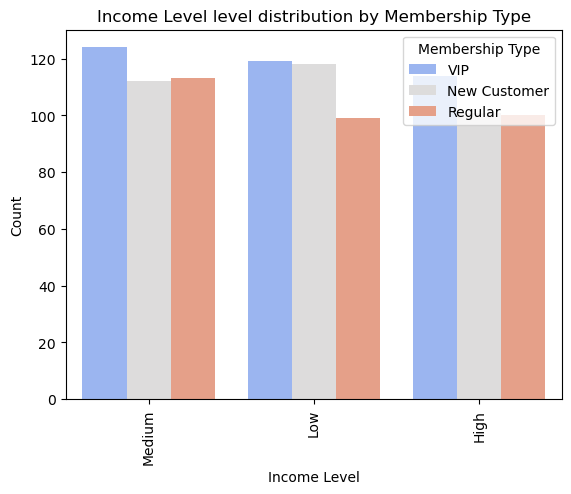

In [15]:
# Visualize Income Level Distribution & Customer Segments
grp_dis('Income Level', 'Membership Type')

In [16]:

# summary tables
count_table = summarize_data(df, 'Income Level', 'Membership Type', metric='count')
percent_table = summarize_data(df, 'Income Level', 'Membership Type', metric='percent')

# Display tables
print(count_table)
print(percent_table)

Membership Type  New Customer  Regular  VIP
Income Level                               
High                      101      100  114
Low                       118       99  119
Medium                    112      113  124
Membership Type  New Customer    Regular        VIP
Income Level                                       
High                32.063492  31.746032  36.190476
Low                 35.119048  29.464286  35.416667
Medium              32.091691  32.378223  35.530086


##### VIP Customers are well-distributed across all Income Levels
Around 35-36% of customers in each income group are VIP members.
This suggests that the VIP membership is not strongly tied to income level—customers from all backgrounds are willing to engage at this level.

##### "Regular" membership is slightly more common in the Medium-Income group
32.38% of Medium-Income customers are Regular members, compared to 29.46% in Low-Income and 31.75% in High-Income groups.
This may indicate that middle-income customers prefer balancing benefits and costs when choosing memberships.

##### New Customers are more frequent in the Low-Income group
35.12% of Low-Income customers are New Customers, the highest among all income groups.
This suggests that lower-income customers might be newer to the brand, possibly still evaluating their purchasing behavior.

📌 Key Takeaways:
The VIP membership is popular across all income levels, suggesting an effective marketing strategy or compelling membership benefits.
Medium-income customers lean towards "Regular" memberships, possibly indicating a budget-conscious yet engaged segment.
Low-income customers have the highest percentage of "New Customers", highlighting an opportunity to convert them into long-term members.

C:\Users\Admin\AppData\Local\Temp\ipykernel_3920\826196180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="Total Amount", palette="coolwarm", order=df[col].value_counts().index)


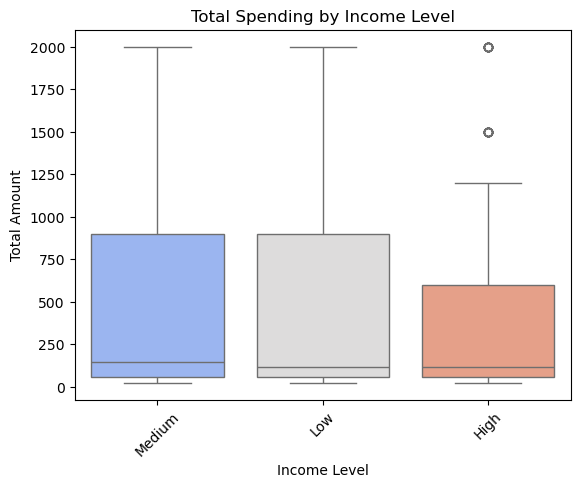

In [18]:
# identify factors that influence spending patterns
totalamount('Income Level')

Observations:
The spending distribution is highly skewed, with some high outliers in each category.

Median spending is relatively low across all income levels.

"Medium" and "Low" income groups have wider interquartile ranges (IQR), suggesting more variation in spending.

The "High" income group appears to have lower spending variability, though some high outliers exist.

Insights:
"Low" & "Medium" income groups have a few big spenders, which might indicate that some lower-income customers still spend significantly.

"High" income customers may not necessarily be the highest spenders, suggesting that income level alone is not the strongest predictor of spending behavior.

Marketing strategies should target high-spending customers within all income levels instead of assuming higher-income customers spend more.

C:\Users\Admin\AppData\Local\Temp\ipykernel_3920\826196180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="Total Amount", palette="coolwarm", order=df[col].value_counts().index)


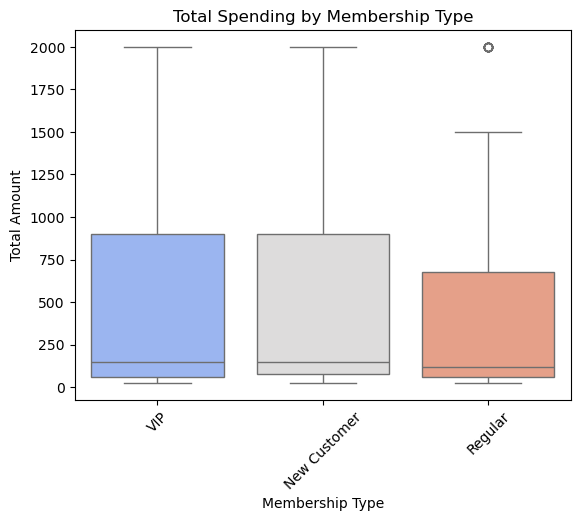

In [20]:
totalamount('Membership Type')

Observations:
"VIP" and "New Customers" have similar spending distributions.

Regular members tend to have a lower median spending compared to VIPs.

There are more extreme outliers in the "Regular" category, which means that while most regular customers spend less, a few spend significantly more.

Insights:
New Customers spend as much as VIPs, meaning early engagement strategies are crucial to retain high-spending new customers.

Regular customers may need loyalty incentives or upselling strategies to encourage them to spend more.

A personalized rewards program could convert high-spending "Regular" customers into VIP members.

## Customer Spending Behavior

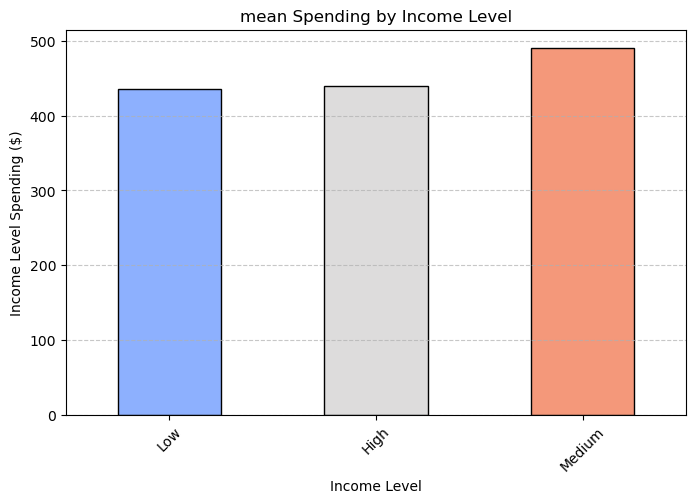

,Income Level,Total Amount
0,High,439.301587
1,Low,435.907738
2,Medium,490.415473


In [23]:
# Average Spending by Income Level
spending('Income Level','mean')
summarize_data(df, 'Income Level','Total Amount', 'mean')

From the bar chart and data table, we can draw the following insights:

Medium Income Level Customers Spend the Most

Customers with a Medium income level have the highest average total spending of approximately $490.42.

Low and High Income Levels Have Similar Spending Patterns

Customers with Low income have an average spending of around $435.91.

Customers with High income have an average spending of $439.30, which is very close to the Low-income group's spending.

This suggests that having a higher income does not necessarily mean higher spending in this dataset.

Possible Interpretations
Spending Behavior Is Not Directly Correlated with Income Level:

The highest spending group is Medium Income, not High Income, which may indicate that:

Medium-income customers feel more financially comfortable to spend.

High-income customers may save or invest more instead of spending on retail.

Marketing Implications:

If the business wants to increase sales, targeting the Medium Income segment with promotions or loyalty programs could be beneficial.

High-income customers may need exclusive or premium product offerings to increase spending.

Low-income customers could respond well to discounts or installment payment options.

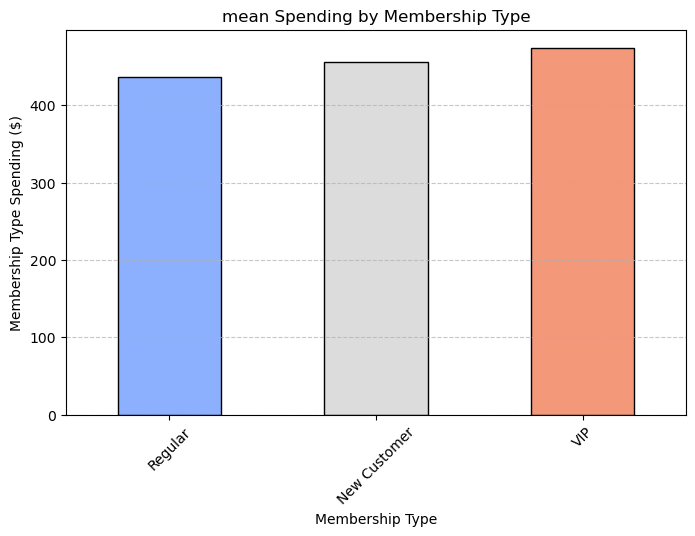

,Membership Type,Total Amount
0,New Customer,455.528701
1,Regular,435.929487
2,VIP,473.977591


In [25]:
# Average Spending by Membership Type
spending('Membership Type', 'mean')
summarize_data(df, 'Membership Type','Total Amount', 'mean')

Spending trends by membership type show that VIP customers have the highest average spending, followed by New Customers and then Regular customers. This suggests that VIP members, who may receive exclusive offers or benefits, tend to spend more on average than other groups. It would be useful to analyze if certain product categories or promotions drive this spending behavior.

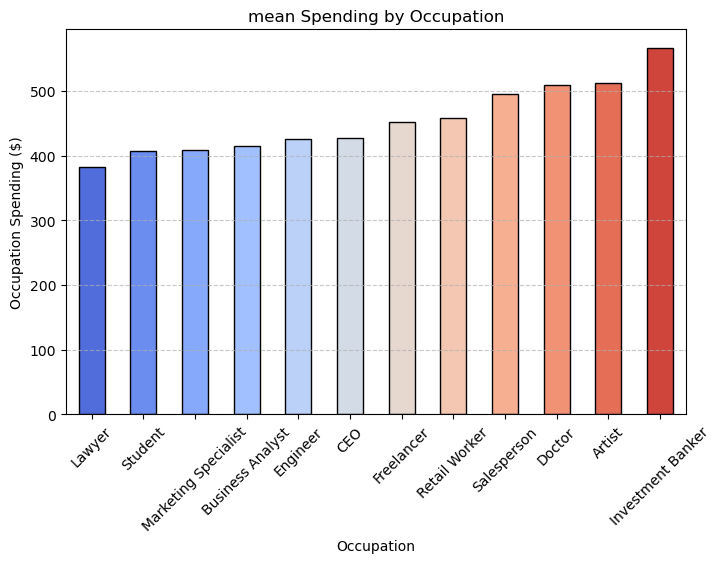

,Occupation,Total Amount
0,Artist,512.739726
1,Business Analyst,414.810127
2,CEO,426.790123
3,Doctor,509.184783
4,Engineer,426.217949
5,Freelancer,451.988636
6,Investment Banker,566.968085
7,Lawyer,383.333333
8,Marketing Specialist,408.910256
9,Retail Worker,457.941176


In [27]:
# Average Spending by Occupation
spending('Occupation','mean')
summarize_data(df, 'Occupation','Total Amount', 'mean')

Occupations with the Highest Spending:
Investment Banker has the highest average spending (~$567).

Artist and Doctor also have high spending levels (~$512 and ~$509).

Occupations with the Lowest Spending:
Lawyer has the lowest average spending (~$383).

Student, Marketing Specialist, and Business Analyst also have relatively lower spending (~$407 - $415).

Overall Trends:
Finance, Arts, and Medical professions tend to have higher spending (Investment Banker, Artist, Doctor).

Academic and Marketing-related professions tend to spend less (Student, Marketing Specialist).

Freelancers and Retail Workers have moderate spending (~$451), neither too high nor too low.

Key Insights:
Investment Bankers, Artists, and Doctors are high-value customers, making them a good target for premium offerings.

Lawyers and Students have lower spending, so they may need promotional strategies to boost purchases.

Freelancers and Retail Workers have steady spending habits, which can be leveraged for targeted marketing campaigns.

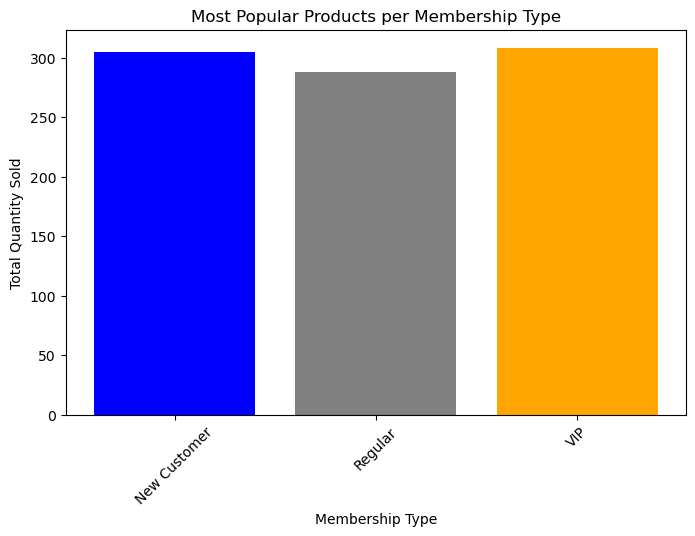

  Membership Type Product Category  Quantity
2    New Customer      Electronics       305
4         Regular         Clothing       288
7             VIP         Clothing       308


In [29]:
# Most Popular Product Category per Membership Type
# Group by Membership Type and Product Category, then sum quantity
popular_products = df.groupby(['Membership Type', 'Product Category'])['Quantity'].sum().reset_index()

# Find the most popular product per segment
most_popular = popular_products.loc[popular_products.groupby('Membership Type')['Quantity'].idxmax()]

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(most_popular['Membership Type'], most_popular['Quantity'],color=['blue', 'gray', 'orange'])
plt.xlabel('Membership Type')
plt.ylabel('Total Quantity Sold')
plt.title('Most Popular Products per Membership Type')
plt.xticks(rotation=45)
plt.show()

# Display the most popular products
print(most_popular)

New Customers Prefer Electronics

Electronics is the top-selling category for new customers, with 305 units sold.

This suggests that new customers may be tech-savvy or prefer purchasing gadgets when they first join.

Regular and VIP Members Prefer Clothing

Regular customers bought 288 units of Clothing, while VIP members bought 308 units.

This indicates that long-term customers are more engaged in fashion-related purchases.

Overall Trend

Electronics is more appealing to new customers, while clothing dominates among returning customers.

VIP members tend to buy slightly more than regular members, which aligns with expectations that high-tier members are more engaged shoppers.

Potential Business Actions:
For New Customers:

Offer targeted discounts on electronics to encourage repeat purchases.

Use personalized marketing to recommend complementary products (e.g., accessories, warranties).

For Regular & VIP Members:

Provide exclusive clothing promotions or loyalty rewards to maintain engagement.

Create VIP-only fashion collections or early access to new clothing lines.

## Geographic Insights
- Map Customer Transactions using Latitude & Longitude
- Find Regional Sales Trends
- Visualize High-Spending Areas

In [32]:
# Heatmap of Customer Transactions
!pip install folium pandas
import folium
from folium.plugins import HeatMap

# Define the initial location (center of the dataset)
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
# Create a Heatmap
heatmap = folium.Map(location=map_center, zoom_start=10)

# Add Heatmap Layer
HeatMap(df[['Latitude', 'Longitude', 'Total Amount']].values).add_to(heatmap)

heatmap

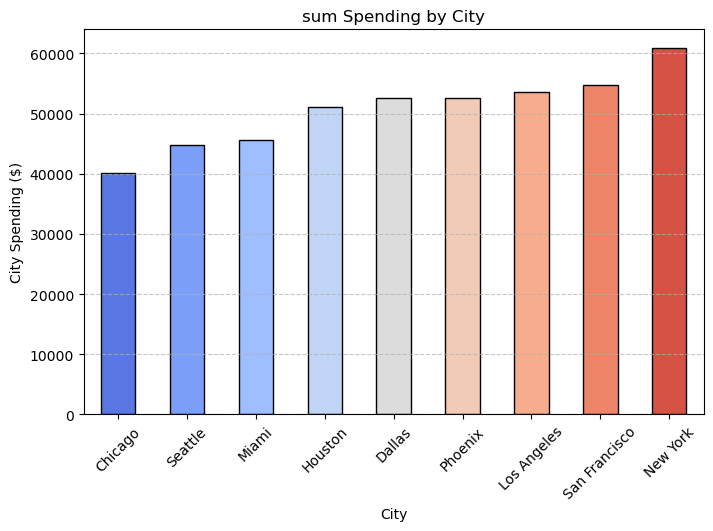

,City,Total Amount
0,Chicago,40110
1,Dallas,52570
2,Houston,51105
3,Los Angeles,53550
4,Miami,45610
5,New York,60960
6,Phoenix,52600
7,San Francisco,54700
8,Seattle,44795


In [33]:
spending('City','sum')
summarize_data(df, 'City','Total Amount', 'sum')

Major metropolitan areas (New York, San Francisco, Los Angeles) have the highest spending, likely due to higher living costs and consumer purchasing power.

Mid-sized cities like Chicago and Seattle have lower spending, possibly due to a smaller customer base or different spending habits.

Spending habits vary across cities, influenced by income levels, cost of living, and cultural preferences.

High-Spending Cities (New York, San Francisco, Los Angeles)
Mindset: Customers in these cities are willing to spend more for convenience, exclusivity, and premium products.

Strategy: Focus on premium services, express delivery, and luxury offerings.

Example: Exclusive online shopping events, early access to new products.

Moderate-Spending Cities (Dallas, Phoenix, Houston)
Mindset: Customers seek value-for-money products and are influenced by promotions.

Strategy: Run bundled promotions, targeted ads, and seasonal discounts.

Example: Flash sales, free shipping on bulk orders.

Low-Spending Cities (Chicago, Seattle, Miami)
Mindset: These customers are more cautious with spending and prefer affordable options.

Strategy: Offer budget-friendly products, subscription models, or buy now, pay later plans.

Example: Discounted subscription plans, "pay-in-installments" options.

In [35]:
# Visualize High-Spending Area -> by tableau

## Customer Loyalty & Segmentation Analysis
- Customer Retention by Membership Type (VIP, Regular, New Customer)
- Identify High-Value Customers
- Analyze Purchase Frequency by Customer Type

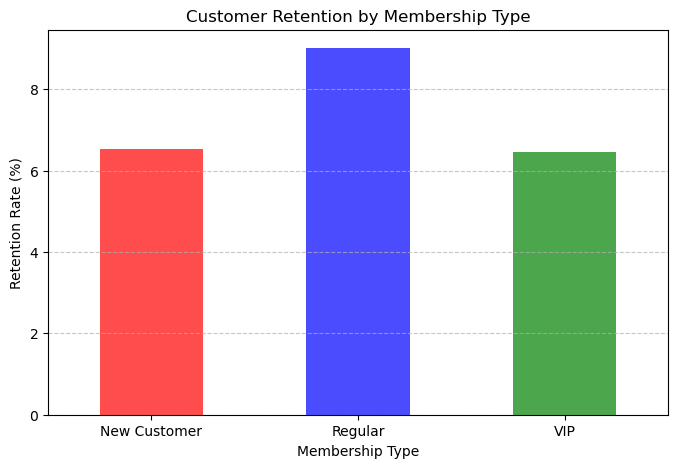

In [37]:
# Customer Retention by Membership Type (VIP, Regular, New Customer)
## Define retention (Customers who made purchases after 6 months)

df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
# Get first and last purchase date for each customer
customer_lifecycle = df.groupby('Customer ID').agg(
    First_Purchase=('Date', 'min'),
    Last_Purchase=('Date', 'max'),
    Membership_Type=('Membership Type', 'first')  # Keep the first membership type
).reset_index()

# Define retention: Customers who purchased again after 6 months
customer_lifecycle['Retention'] = (customer_lifecycle['Last_Purchase'] - customer_lifecycle['First_Purchase']).dt.days > 180

# Calculate retention rate by Membership Type
retention_rate = customer_lifecycle.groupby('Membership_Type')['Retention'].mean() * 100

# Plot the retention rate
plt.figure(figsize=(8, 5))
retention_rate.plot(kind='bar', color=['red', 'blue', 'green'], alpha=0.7)
plt.title("Customer Retention by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Retention Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
customer_counts = df['Customer ID'].value_counts()  # Count the number of occurrences of each Customer ID
num_customers = (customer_counts > 2).sum()  # Count the number of customers with transactions greater than 2
print(num_customers)

30


# PERDICTION 

In [66]:
# create features
from datetime import datetime

# Create customer-level features
customer_data = df.groupby("Customer ID").agg({
    "Transaction ID": "nunique",  # Unique transactions (Frequency)
    "Total Amount": "sum",        # Total spending (Monetary)
    "Date": lambda x: (datetime.today() - x.max()).days  # Recency
}).reset_index()

# Rename columns
customer_data.columns = ["Customer ID", "Frequency", "Monetary", "Recency"]

# Preview
customer_data.head()


,Customer ID,Frequency,Monetary,Recency
0,CUST001,2,300,491
1,CUST002,1,1000,761
2,CUST004,2,900,548
3,CUST005,1,100,693
4,CUST007,2,100,470


In [68]:
# Churn Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Add categorical features
customer_data = df[['Customer ID', 'Gender', 'Age', 'Income Level', 'Membership Type']].drop_duplicates().merge(customer_data, on="Customer ID")

# Encode categorical variables
customer_data = pd.get_dummies(customer_data, columns=['Gender', 'Income Level', 'Membership Type'], drop_first=True)

# Define target variable: Returning Customer (1 if Frequency > 1 else 0)
customer_data['Returning Customer'] = customer_data['Frequency'].apply(lambda x: 1 if x > 1 else 0)

# Split data
X = customer_data.drop(columns=['Customer ID', 'Returning Customer'])
y = customer_data['Returning Customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [76]:
# export the result to import to tableau
# Predict for all customers
customer_data['Predicted Returning Customer'] = model.predict(scaler.transform(X))

# Save to CSV
customer_data[['Customer ID', 'Predicted Returning Customer']].to_csv("D:/project/predictions.csv", index=False)

# ACTIONABLE INSIGHTS & RECOMMENDATION
#### Customer Segmentation Insights
Customers can be grouped based on spending patterns (high spenders vs. low spenders).

Age, gender, and income levels influence total spending behavior.

Repeat customers spend more than one-time buyers.

✅ Recommendation:

Develop personalized marketing campaigns for high spenders.

Use loyalty programs to encourage repeat purchases.

#### Spending Behavior Analysis
The average spending per transaction varies significantly between customer segments.

Certain categories/products drive more revenue than others.

✅ Recommendation:

Optimize inventory to focus on high-performing product categories.

Implement bundling strategies to increase order value.

#### Geographic Influence on Sales
Sales vary by region—some areas have higher spending customers.

Specific locations have seasonal trends affecting purchase behavior.

✅ Recommendation:

Allocate marketing budgets to high-revenue regions.

Offer seasonal promotions in regions with fluctuating demand.

#### RFM Analysis & Customer Retention
Recency-Frequency-Monetary (RFM) analysis identifies potential churn customers.

High-frequency buyers generate more revenue over time.

✅ Recommendation:

Set up automated re-engagement campaigns for customers with decreasing activity.

Provide exclusive deals to loyal customers.

#### Sales Forecasting & Demand Prediction
Trends suggest that certain times of the year generate peak sales.

High-spending customers follow predictable purchasing cycles.

✅ Recommendation:

Use predictive models to anticipate demand and optimize stock levels.

Schedule discounts or promotions to align with peak buying periods.